<figure>
    <center>
    <img src="../../figures/kinki2.png"  width="400" height="370" align="center"/>
    </center>
</figure>

# <span style="color:blue"><center>Hackathon: Shinkansen Travel Experience</center></span>

# <span style="color:red"><center>Exploration Data Analysis</center></span>

## <span style="color:green"><center>Looking for Missing Values</center></span>

## <span style="color:blue">Authors</span>

1. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com
1. Juan Felipe Contreras Alcívar, j.contrerasa94@gmail.com

## <span style="color:blue">References</span>

1. [Ref to Link](link here)

## <span style="color:blue">Libraries Used</span>

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')
pd.set_option("display.max_colwidth", 200)

## <span style="color:blue">Read Full Data</span>

The blah blah of why we merged the data

In [2]:
train_df = pd.read_csv('../../input/train/merged/train_merged.csv', sep=';')
test_df = pd.read_csv('../../input/test/merged/test_merged.csv', sep=';')

## <span style="color:blue">Analysis of Train Missing Data</span>

In [3]:
data_missing = []
for col in train_df.columns:
    if train_df[col].isna().any():
        data_missing.append([col, train_df[col].isna().sum(), sorted(train_df[col].astype(str).unique())])
        
train_missing_analysis = pd.DataFrame(data_missing, columns=["feature", "num_nans_train", "posible_values_train"])
train_missing_analysis.sort_values(by="num_nans_train", ascending=False)

,feature,num_nans_train,posible_values_train
3,Type_Travel,9226,"[Business Travel, Personal Travel, nan]"
1,Customer_Type,8951,"[Disloyal Customer, Loyal Customer, nan]"
7,Arrival_Time_Convenient,8930,"[Acceptable, Excellent, Extremely Poor, Good, Needs Improvement, Poor, nan]"
8,Catering,8741,"[Acceptable, Excellent, Extremely Poor, Good, Needs Improvement, Poor, nan]"
14,Onboard_Service,7601,"[Acceptable, Excellent, Extremely Poor, Good, Needs Improvement, Poor, nan]"
5,Arrival_Delay_in_Mins,357,"[0.0, 1.0, 10.0, 100.0, 101.0, 1011.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 11.0, 110.0, 111.0, 1115.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 12.0, 120.0, 121...."
16,Baggage_Handling,142,"[Acceptable, Excellent, Good, Needs Improvement, Poor, nan]"
12,Online_Support,91,"[Acceptable, Excellent, Extremely Poor, Good, Needs Improvement, Poor, nan]"
15,Legroom,90,"[Acceptable, Excellent, Extremely Poor, Good, Needs Improvement, Poor, nan]"
0,Gender,77,"[Female, Male, nan]"


## <span style="color:blue">Analysis of Test Missing Data</span>

In [4]:
data_missing = []
for col in test_df.columns:
    if test_df[col].isna().any():
        data_missing.append([col, test_df[col].isna().sum(), sorted(test_df[col].astype(str).unique())])
        
test_missing_analysis = pd.DataFrame(data_missing, columns=["feature", "num_nans_test", "posible_values_test"])
test_missing_analysis.sort_values(by="num_nans_test", ascending=False)

,feature,num_nans_test,posible_values_test
3,Type_Travel,3448,"[Business Travel, Personal Travel, nan]"
1,Customer_Type,3383,"[Disloyal Customer, Loyal Customer, nan]"
8,Catering,3357,"[Acceptable, Excellent, Extremely Poor, Good, Needs Improvement, Poor, nan]"
7,Arrival_Time_Convenient,3325,"[Acceptable, Excellent, Extremely Poor, Good, Needs Improvement, Poor, nan]"
14,Onboard_Service,2872,"[Acceptable, Excellent, Good, Needs Improvement, Poor, nan]"
5,Arrival_Delay_in_Mins,123,"[0.0, 1.0, 10.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 11.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 12.0, 120.0, 121.0, 122.0, 123.0,..."
16,Baggage_Handling,40,"[Acceptable, Excellent, Good, Needs Improvement, Poor, nan]"
0,Gender,30,"[Female, Male, nan]"
4,Departure_Delay_in_Mins,29,"[0.0, 1.0, 10.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 11.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 12.0, 120.0, 121.0, 122.0, 123.0,..."
12,Online_Support,26,"[Acceptable, Excellent, Good, Needs Improvement, Poor, nan]"


## <span style="color:blue">Analysis of Missing Data</span>

In [5]:
missing_analysis = train_missing_analysis.merge(test_missing_analysis, on="feature")
missing_analysis = missing_analysis.sort_values(by="num_nans_train", ascending=False)
missing_analysis["difference"] = missing_analysis.apply(
    lambda row: set(row["posible_values_train"]).symmetric_difference(set(row["posible_values_test"])),
    axis=1
)
missing_analysis

,feature,num_nans_train,posible_values_train,num_nans_test,posible_values_test,difference
3,Type_Travel,9226,"[Business Travel, Personal Travel, nan]",3448,"[Business Travel, Personal Travel, nan]",{}
1,Customer_Type,8951,"[Disloyal Customer, Loyal Customer, nan]",3383,"[Disloyal Customer, Loyal Customer, nan]",{}
7,Arrival_Time_Convenient,8930,"[Acceptable, Excellent, Extremely Poor, Good, Needs Improvement, Poor, nan]",3325,"[Acceptable, Excellent, Extremely Poor, Good, Needs Improvement, Poor, nan]",{}
8,Catering,8741,"[Acceptable, Excellent, Extremely Poor, Good, Needs Improvement, Poor, nan]",3357,"[Acceptable, Excellent, Extremely Poor, Good, Needs Improvement, Poor, nan]",{}
14,Onboard_Service,7601,"[Acceptable, Excellent, Extremely Poor, Good, Needs Improvement, Poor, nan]",2872,"[Acceptable, Excellent, Good, Needs Improvement, Poor, nan]",{Extremely Poor}
5,Arrival_Delay_in_Mins,357,"[0.0, 1.0, 10.0, 100.0, 101.0, 1011.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 11.0, 110.0, 111.0, 1115.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 12.0, 120.0, 121....",123,"[0.0, 1.0, 10.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 11.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 12.0, 120.0, 121.0, 122.0, 123.0,...","{300.0, 446.0, 486.0, 257.0, 350.0, 374.0, 219.0, 338.0, 457.0, 458.0, 382.0, 823.0, 315.0, 406.0, 290.0, 308.0, 334.0, 422.0, 318.0, 266.0, 312.0, 397.0, 435.0, 543.0, 409.0, 417.0, 294.0, 429.0,..."
16,Baggage_Handling,142,"[Acceptable, Excellent, Good, Needs Improvement, Poor, nan]",40,"[Acceptable, Excellent, Good, Needs Improvement, Poor, nan]",{}
12,Online_Support,91,"[Acceptable, Excellent, Extremely Poor, Good, Needs Improvement, Poor, nan]",26,"[Acceptable, Excellent, Good, Needs Improvement, Poor, nan]",{Extremely Poor}
15,Legroom,90,"[Acceptable, Excellent, Extremely Poor, Good, Needs Improvement, Poor, nan]",25,"[Acceptable, Excellent, Extremely Poor, Good, Needs Improvement, Poor, nan]",{}
0,Gender,77,"[Female, Male, nan]",30,"[Female, Male, nan]",{}


## <span style="color:blue">Concatenate Train and Test</span>

In [6]:
df = pd.concat([train_df, test_df])
df.reset_index(drop=True, inplace=True)
df

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0.0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0.0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1.0,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0.0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1.0,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129976,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,NaN,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
129977,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0,NaN,...,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
129978,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0,NaN,...,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
129979,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,NaN,...,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129981 entries, 0 to 129980
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       129981 non-null  int64  
 1   Gender                   129874 non-null  object 
 2   Customer_Type            117647 non-null  object 
 3   Age                      129937 non-null  float64
 4   Type_Travel              117307 non-null  object 
 5   Travel_Class             129981 non-null  object 
 6   Travel_Distance          129981 non-null  int64  
 7   Departure_Delay_in_Mins  129895 non-null  float64
 8   Arrival_Delay_in_Mins    129501 non-null  float64
 9   Overall_Experience       94379 non-null   float64
 10  Seat_Comfort             129898 non-null  object 
 11  Seat_Class               129981 non-null  object 
 12  Arrival_Time_Convenient  117726 non-null  object 
 13  Catering                 117883 non-null  object 
 14  Plat

## <span style="color:blue">Define Categorical Columns</span>

In [8]:
# List of categorical columns to plot
categorical_columns = [
    'Overall_Experience', 'Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort',
    'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
    'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
    'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling',
    'CheckIn_Service', 'Cleanliness', 'Online_Boarding'
]

In [9]:
for column in categorical_columns:
    df[column] = df[column].astype('category')

## <span style="color:blue">Define Ordinal Values</span>

In [10]:
values_order1 = ['Extremely Poor', 'Poor', 'Needs Improvement', 'Acceptable', 'Good', 'Excellent']
values_order2 = ['Very Inconvenient', 'Inconvenient', 'Needs Improvement', 'Manageable', 'Convenient', 'Very Convenient']

## <span style="color:blue">Define Ordinal Columns</span>

In [11]:
ordinal_columns1 = ['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 
                   'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling',
                   'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

ordinal_columns2 = ['Platform_Location']

In [12]:
for column in ordinal_columns1:
    df[column] = pd.Categorical(df[column], categories=values_order1, ordered=True)

for column in ordinal_columns2:
    df[column] = pd.Categorical(df[column], categories=values_order2, ordered=True)

## <span style="color:blue">Define Numerical Columns</span>

In [13]:
numerical_columns = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

In [14]:
# Initialize the label encoder
label_encoder = LabelEncoder()
encoded_df = df.copy()

# Apply label encoding to all categorical columns
for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

## <span style="color:blue">Plot Distributions</span>

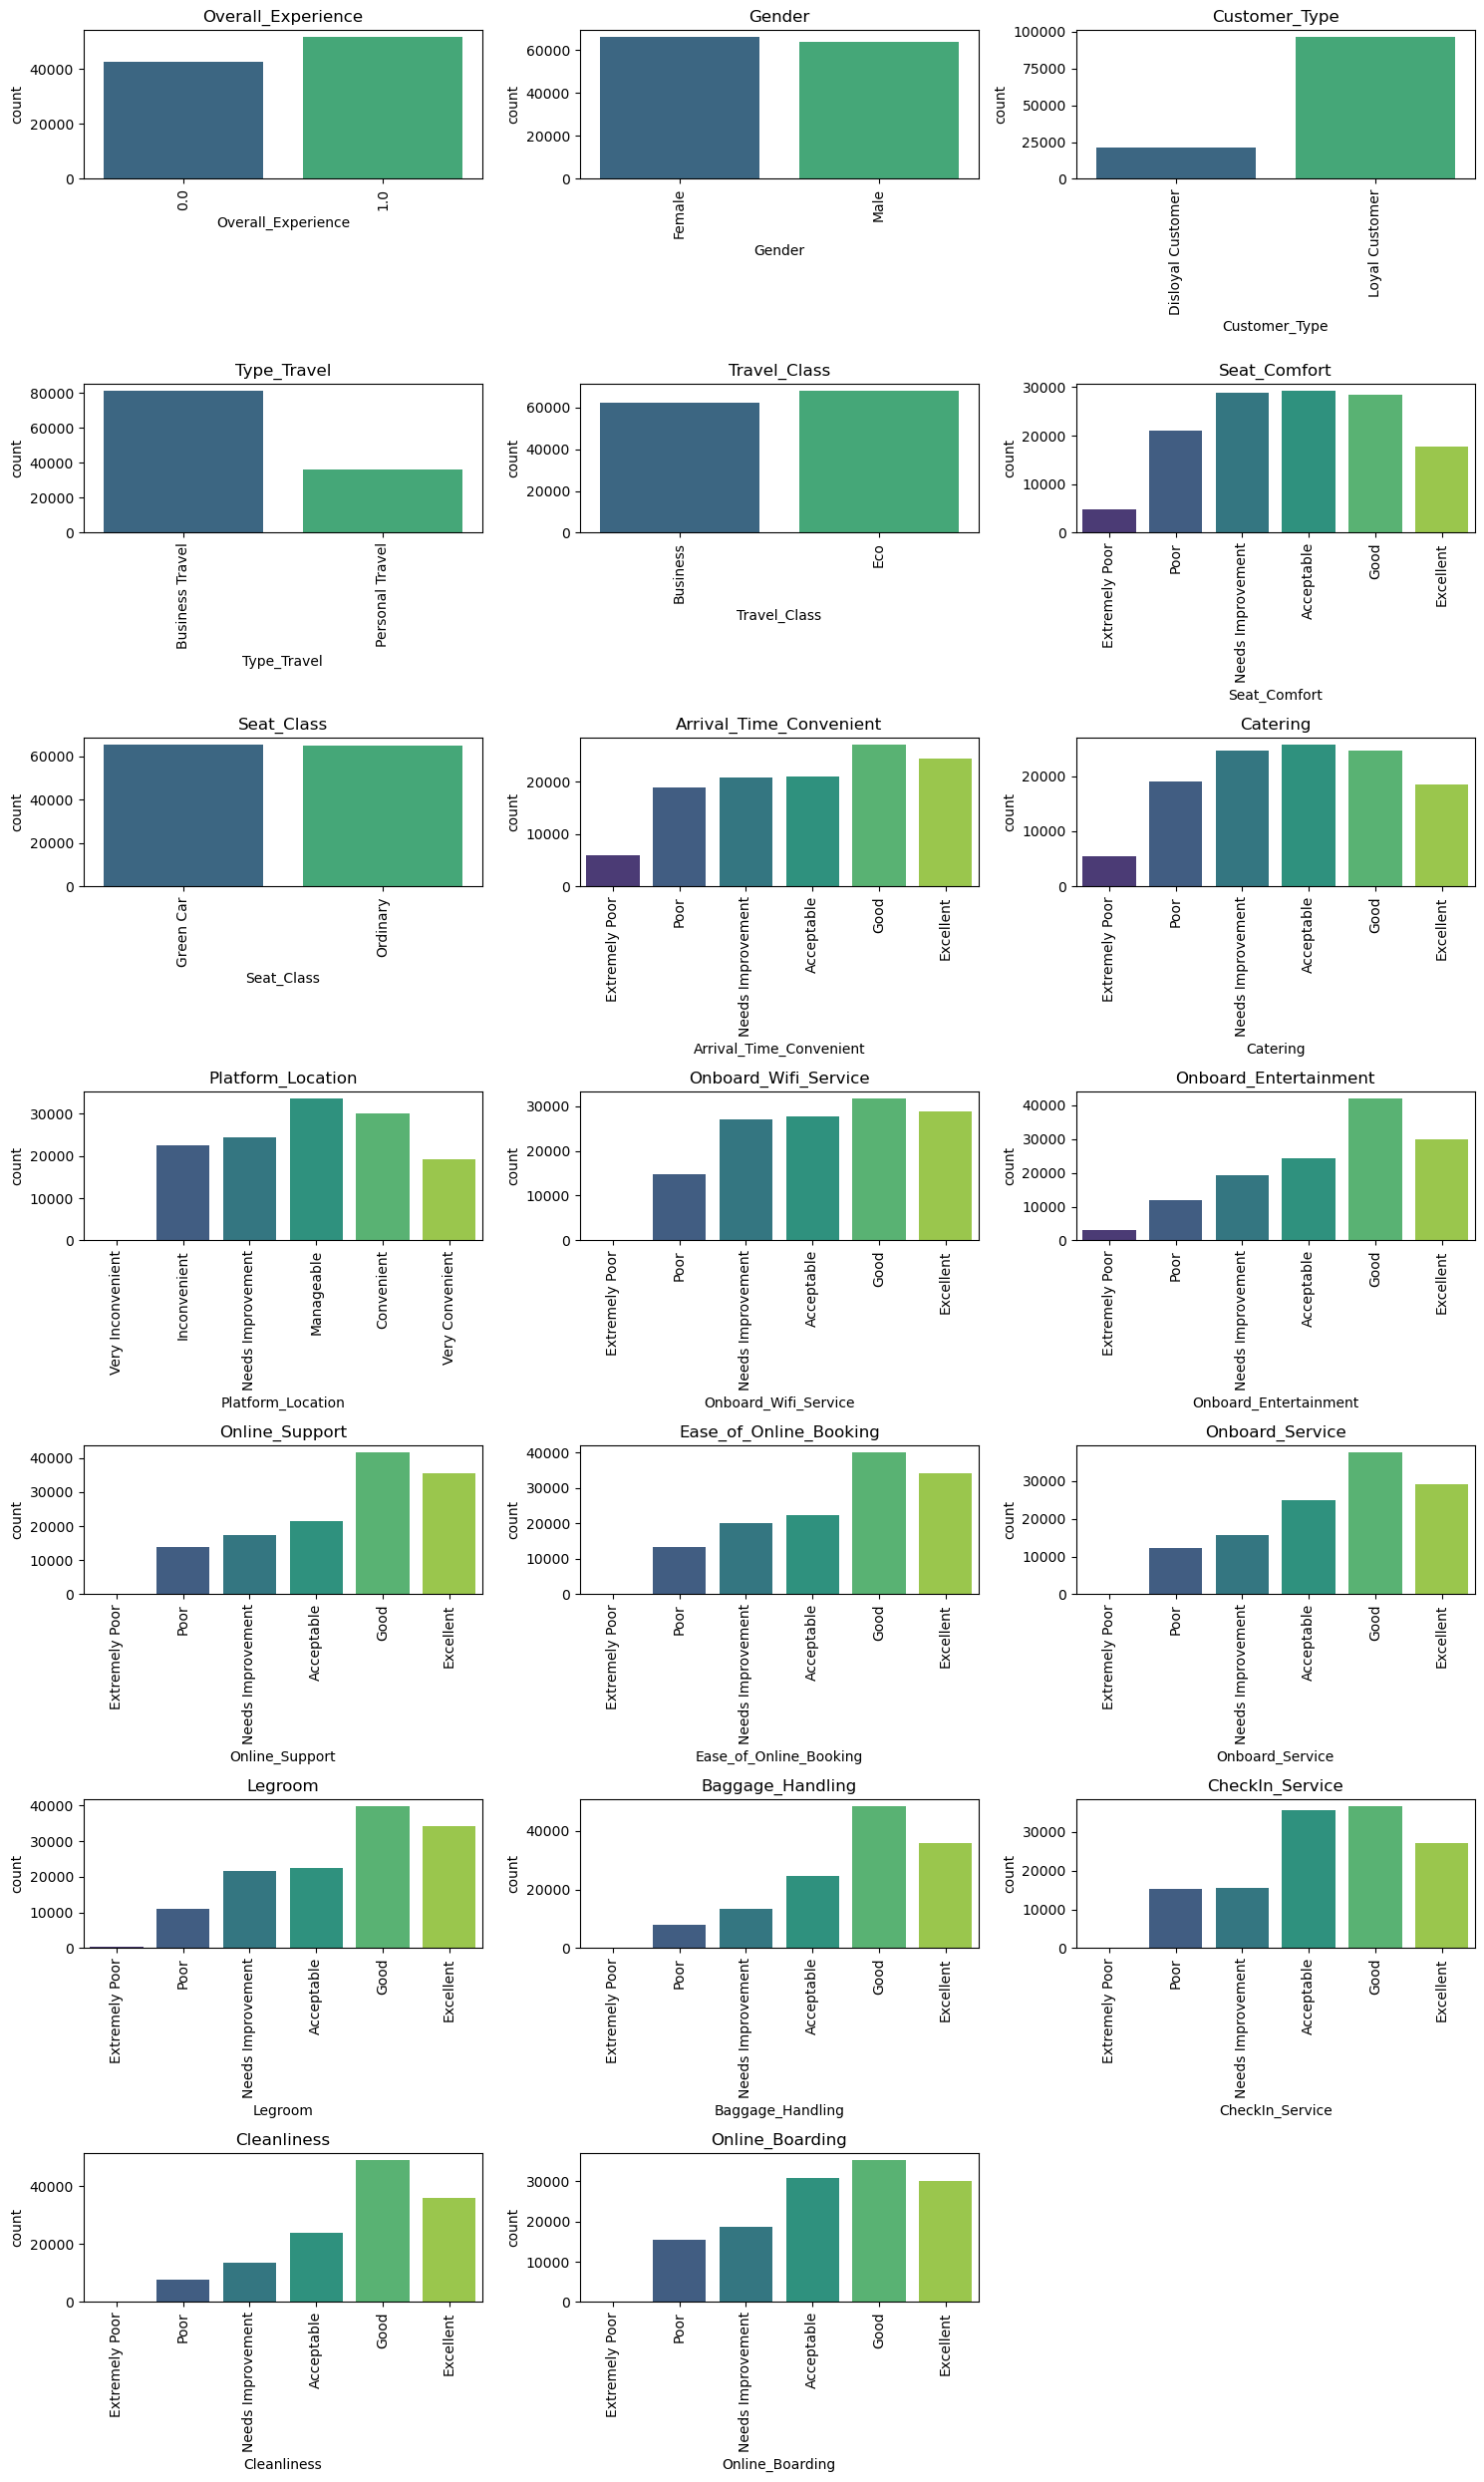

In [15]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 25))


# Plot the count distribution of each categorical variable
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(7, 3, i)

    if column in ordinal_columns1:
        sns.countplot(data=df, x=column, palette='viridis', order=values_order1)

    elif column in ordinal_columns2:
        sns.countplot(data=df, x=column, palette='viridis', order=values_order2)
        
    else:
        sns.countplot(data=df, x=column, palette='viridis')
    plt.title(column)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Text of section X

In [16]:
# Code of section x

### <span style="color:#4CC9F0">Subsection X</span>

Text of subsection X

In [17]:
# Code of subsection x

## <span style="color:blue">Automation</span>

Automation of process

## <span style="color:blue">Conclusions</span>

Conclusions of Notebook

## <span style="color:blue">Recomendations</span>

Recomendations of study made.

In [18]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))    
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [19]:
def point_biserial(x, y):
    return pointbiserialr(x, y)[0]

In [20]:
all_columns = categorical_columns + numerical_columns

corr_matrix = pd.DataFrame(index=all_columns, columns=all_columns)

encoded_df.dropna(inplace=True)

# Calculate Cramér's V for categorical vs. categorical
for col1 in categorical_columns:
    for col2 in categorical_columns:
        corr_matrix.loc[col1, col2] = cramers_v(encoded_df[col1],encoded_df[col2])

# Calculate point-biserial for categorical vs. numerical
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        corr_matrix.loc[cat_col, num_col] = point_biserial(encoded_df[cat_col], encoded_df[num_col])
        corr_matrix.loc[num_col, cat_col] = point_biserial(encoded_df[cat_col], encoded_df[num_col])

# Calculate Pearson for numerical vs. numerical
for col1 in numerical_columns:
    for col2 in numerical_columns:
        corr_matrix.loc[col1, col2] = encoded_df[[col1, col2]].corr().iloc[0, 1]

In [21]:
corr_matrix = corr_matrix.astype(float)

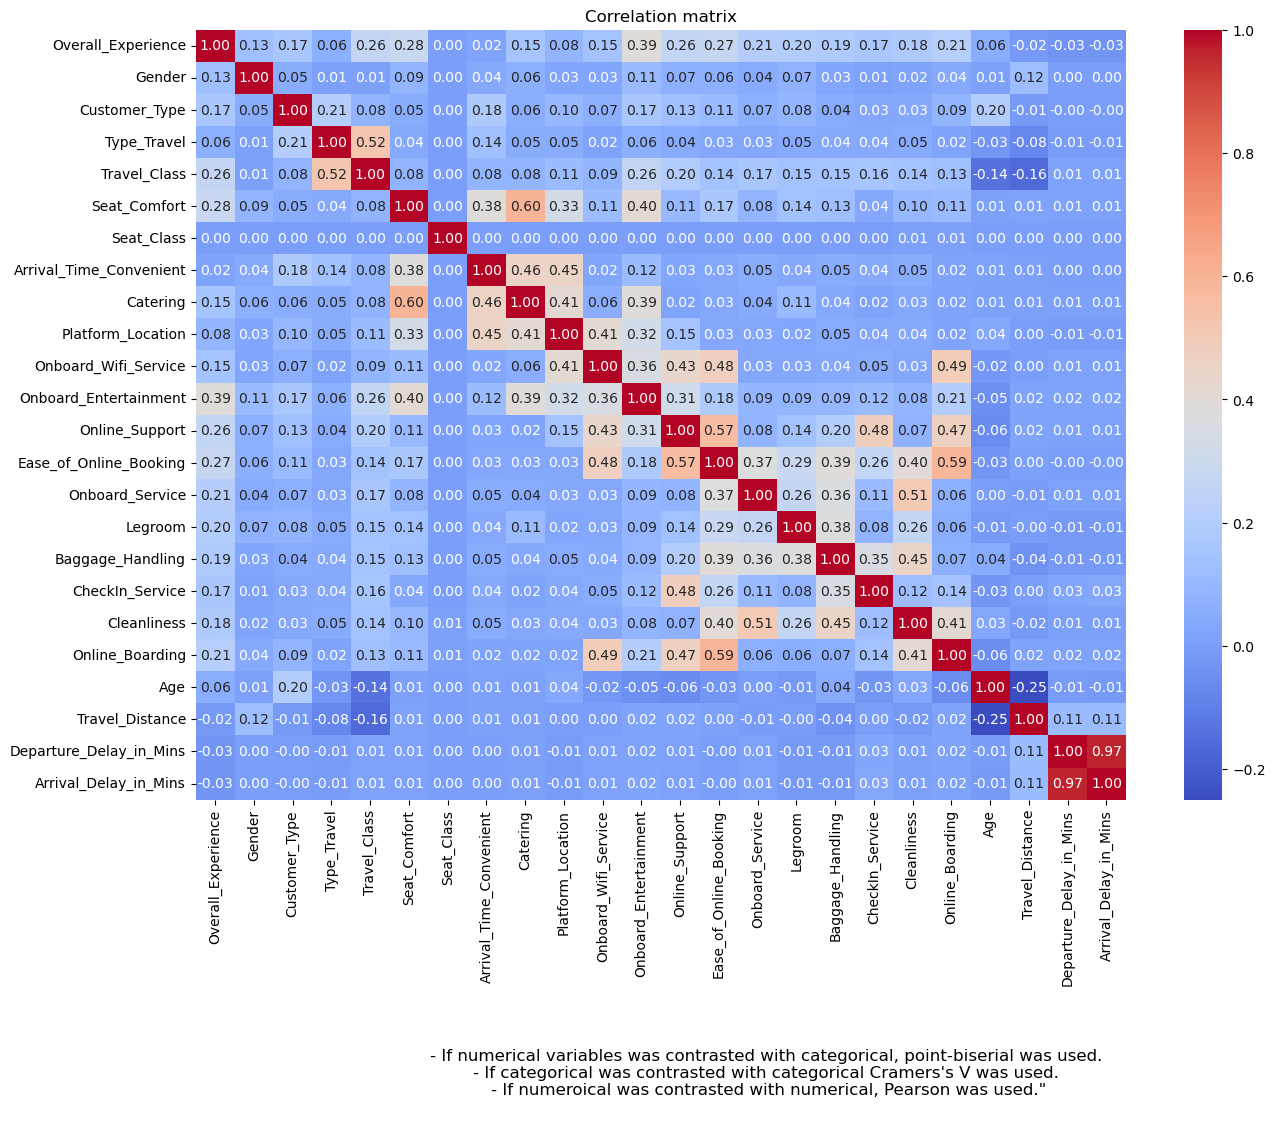

In [22]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation matrix")

caption = f'''
    - If numerical variables was contrasted with categorical, point-biserial was used. 
    - If categorical was contrasted with categorical Cramers's V was used. 
    - If numeroical was contrasted with numerical, Pearson was used."
'''

plt.figtext(0.5, -0.2, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

<h1> Imputing </h1>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [24]:
df = pd.read_csv('../../input/train/merged/train_merged.csv', sep=';')
test_df = pd.read_csv('../../input/test/merged/test_merged.csv', sep=';')

<Axes: >

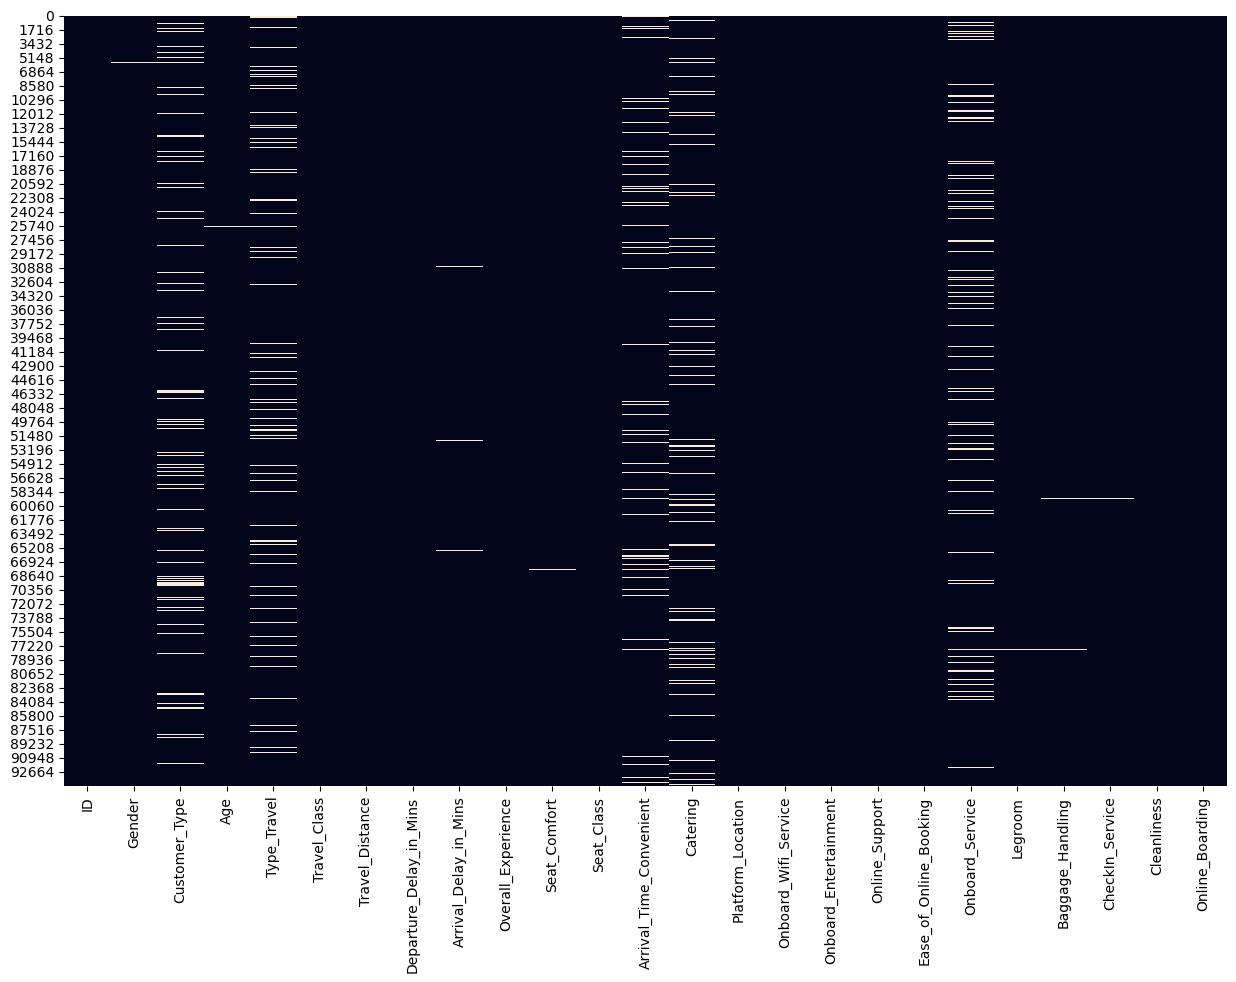

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cbar=False)

In [26]:
# Mean imputation for numerical columns
mean_imputed_data = df.copy()
mean_imputed_data_test = test_df.copy()

for col in mean_imputed_data.drop('Overall_Experience', axis=1).select_dtypes(include=[np.number]).columns:
    mean_imputed_data[col].fillna(mean_imputed_data[col].mean(), inplace=True)
    mean_imputed_data_test[col].fillna(mean_imputed_data[col].mean(), inplace=True)

mean_imputed_data['Overall_Experience'] = df['Overall_Experience']
# Median imputation for numerical columns
median_imputed_data = df.copy()
for col in median_imputed_data.select_dtypes(include=[np.number]).columns:
    median_imputed_data[col].fillna(median_imputed_data[col].median(), inplace=True)

In [27]:
mean_imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94379 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94379 non-null  float64
 8   Arrival_Delay_in_Mins    94379 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [28]:
cat_imputed_data = df.copy()
cat_imputed_data_test = test_df.copy()

for col in cat_imputed_data.select_dtypes(include=[object]).columns:
    cat_imputed_data[col].fillna('No_response', inplace=True)
    cat_imputed_data_test[col].fillna('No_response', inplace=True)

In [29]:
def plot_distributions(original_data, imputed_data, columns, method_name):
    for col in columns:

        fig, ax = plt.subplots(1, 2, figsize=(20, 5))
        fig.suptitle(f'Comparing distribution original vs imputed for {col}', fontsize=15)

        ax[0].hist(original_data[col].dropna(), bins=20, color='blue')
        ax[0].set_title('Original distribution')
        
        ax[1].hist(imputed_data[col].dropna(), bins=20, color='red')
        ax[1].set_title('Imputed distribution')
        plt.show()

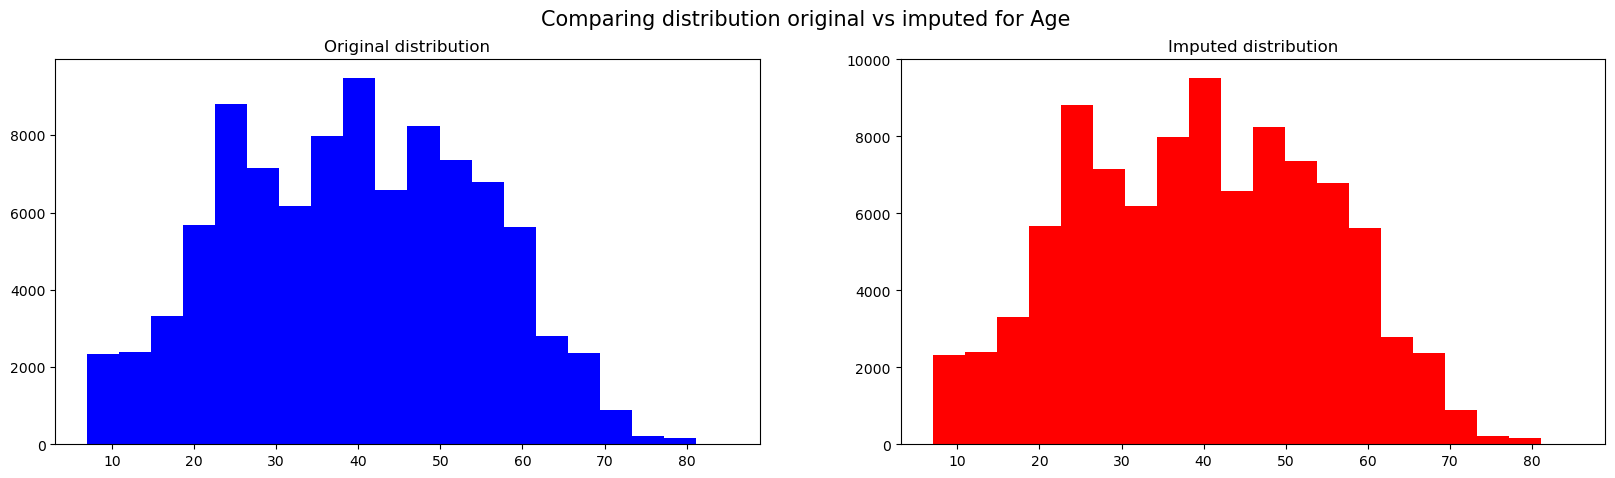

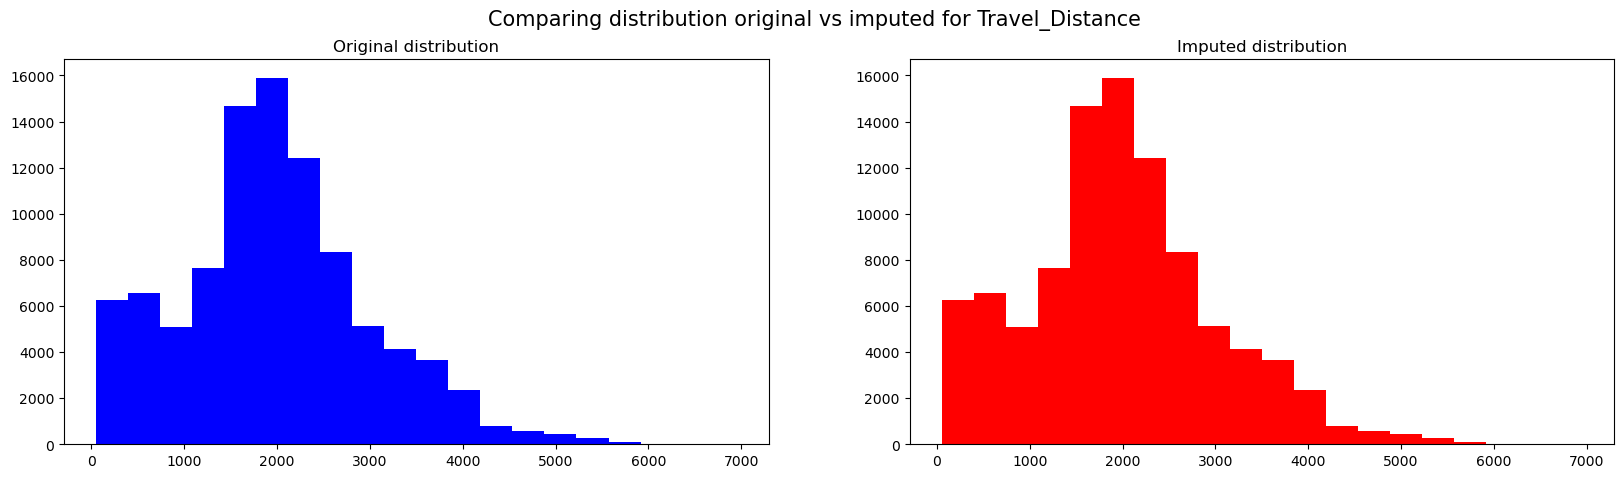

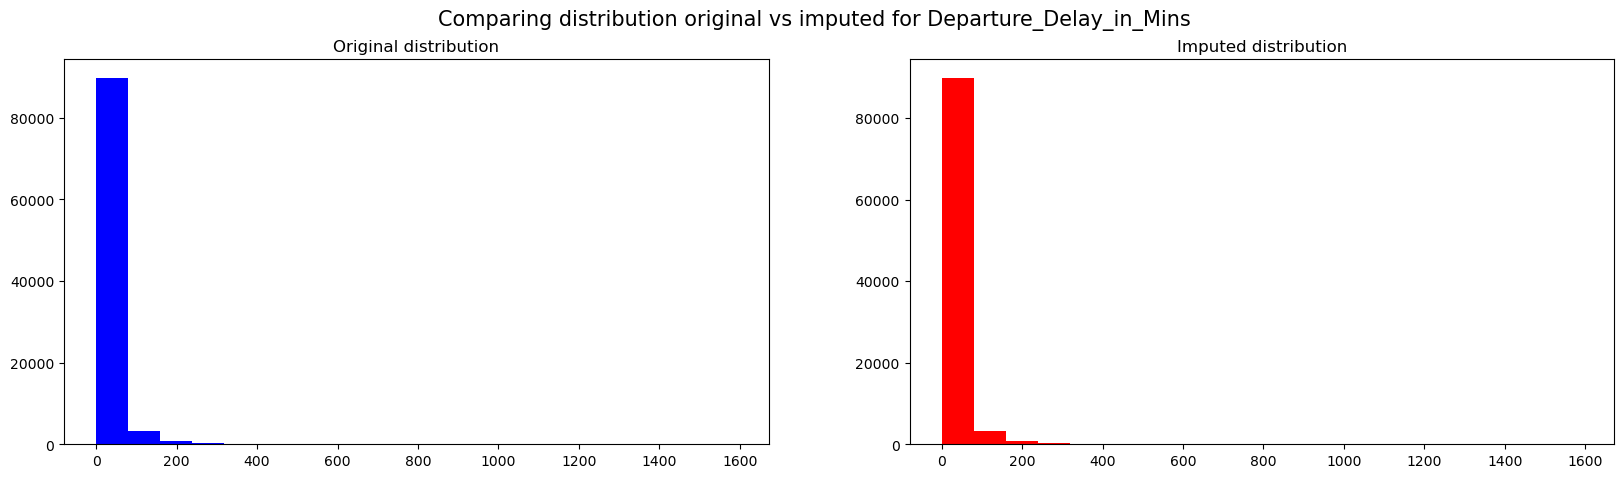

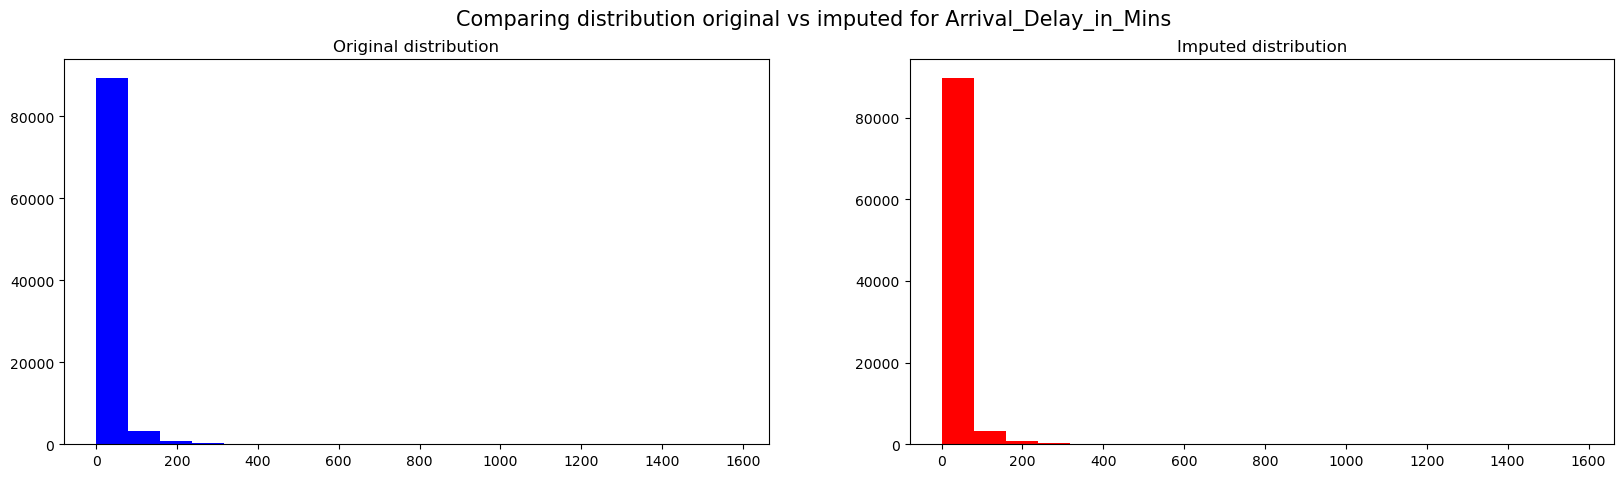

In [30]:
# Specify columns to plot
columns_to_plot = numerical_columns  # You can also include some categorical columns if you want

# Plot distributions for mean imputed data
plot_distributions(df, mean_imputed_data, columns_to_plot, 'Mean Imputed')

In [31]:
def plot_categorical_distribution(original_data, imputed_data, columns, method_name):
    for col in columns:

        # Original data relative frequencies
        original_counts = original_data[col].value_counts(normalize=True)
        original_values = original_counts.index
        original_frequencies = original_counts.values

        # Imputed data relative frequencies
        imputed_counts = imputed_data[col].value_counts(normalize=True)
        imputed_values = imputed_counts.index
        imputed_frequencies = imputed_counts.values

        fig, ax = plt.subplots(1, 2, figsize=(20, 5))

        fig.suptitle(f'Comparing distribution original vs imputed for {col}')
        
        ax[0].bar(original_values, original_frequencies, color='blue', alpha=0.5, label='Original')      
        ax[0].set_title('Original distribution')
        ax[1].bar(imputed_values, imputed_frequencies, color='red', alpha=0.5, label=method_name)
        ax[1].set_title('Imputed values')
        
        plt.show()

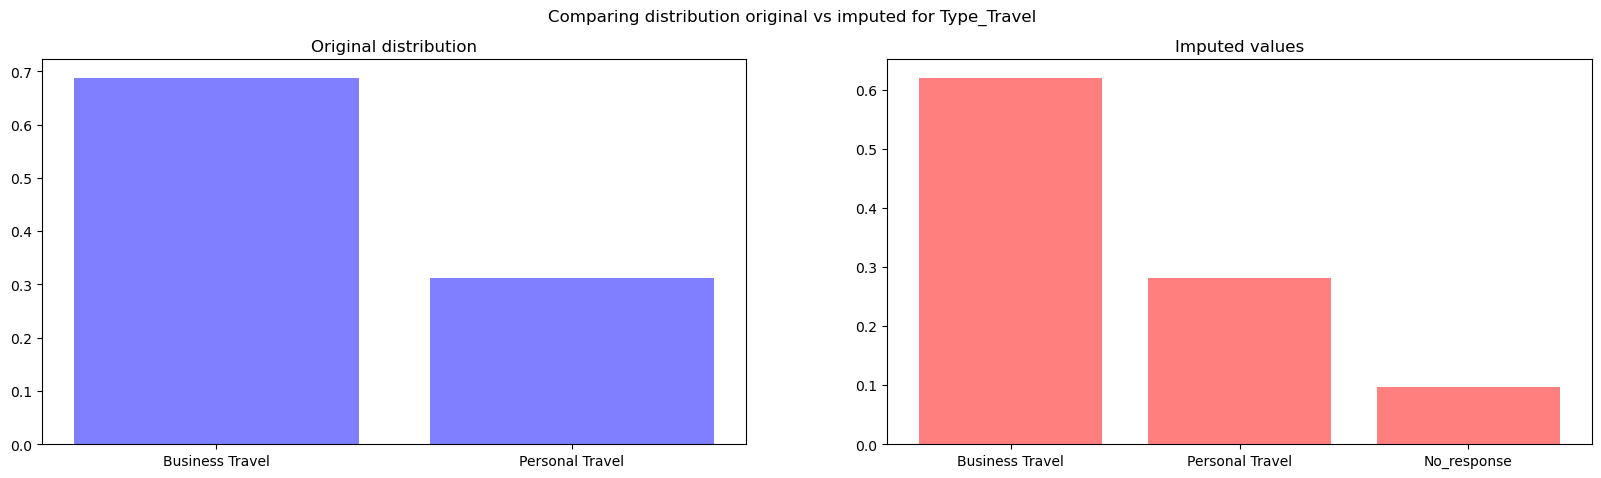

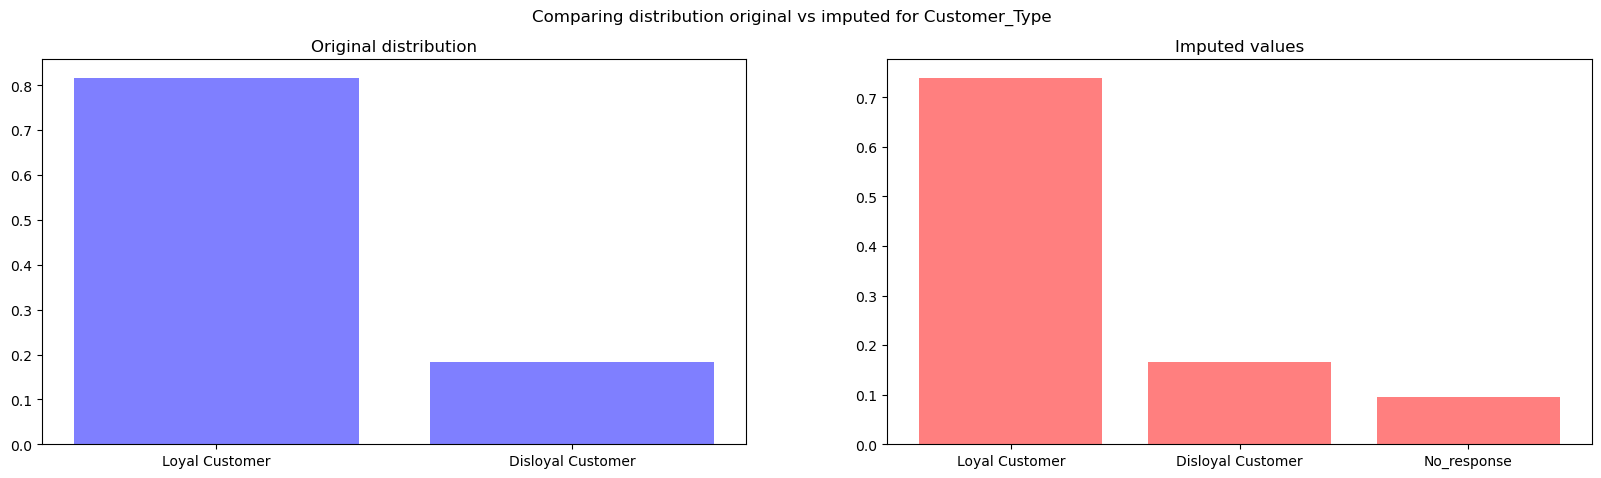

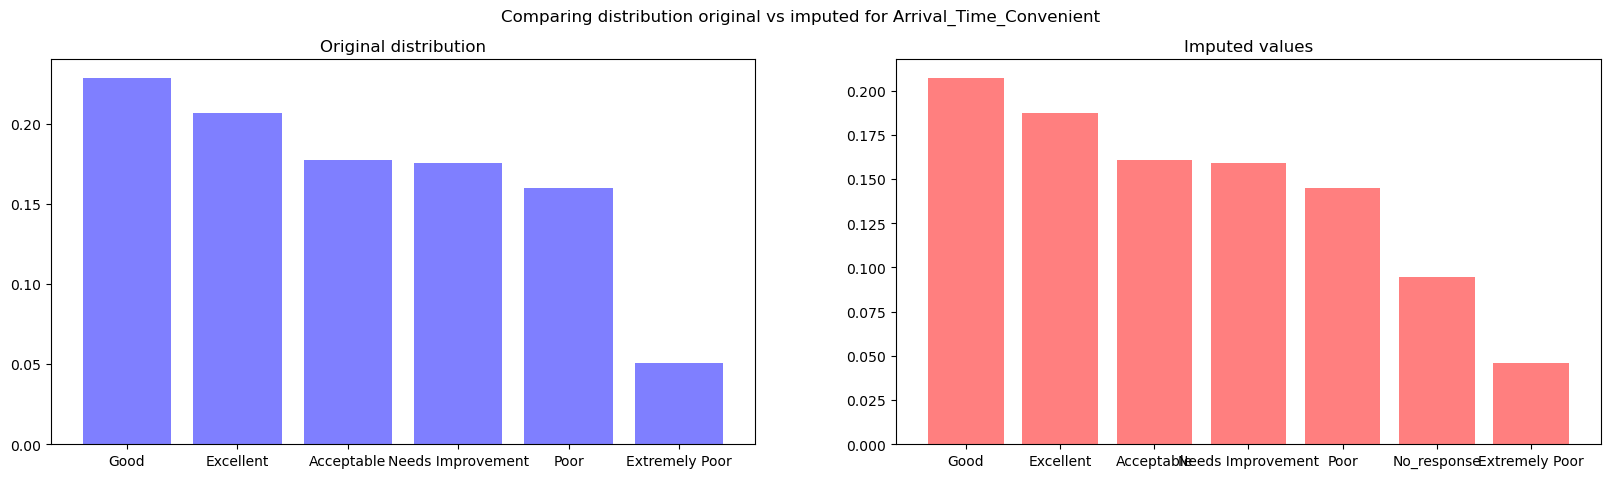

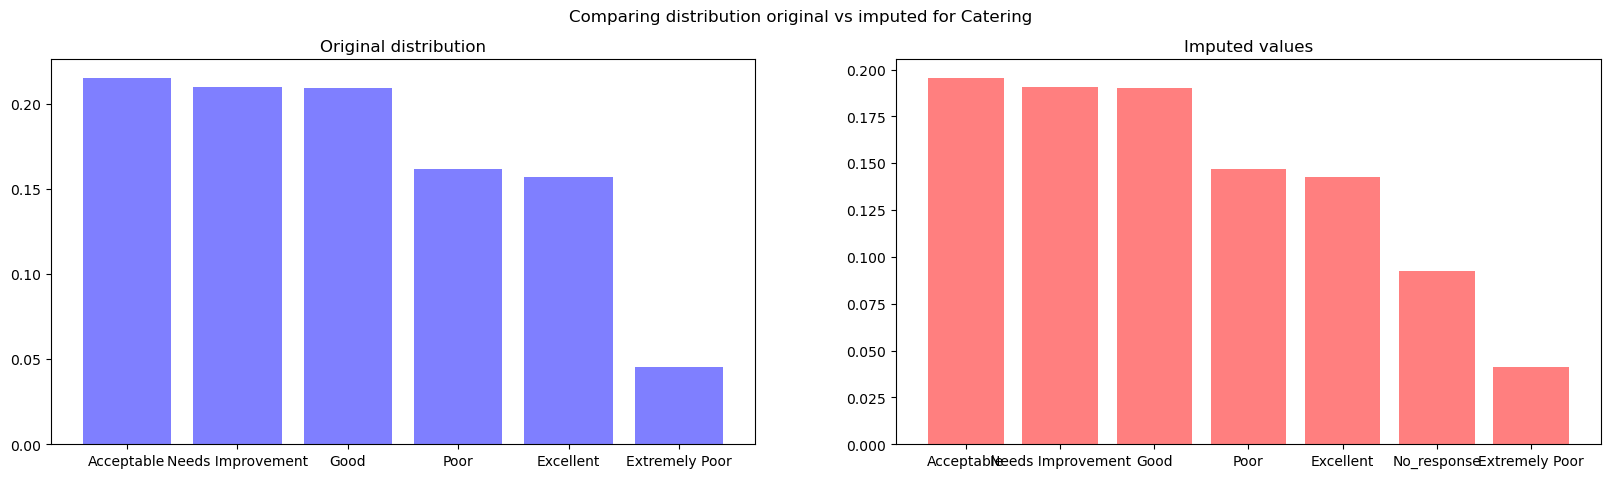

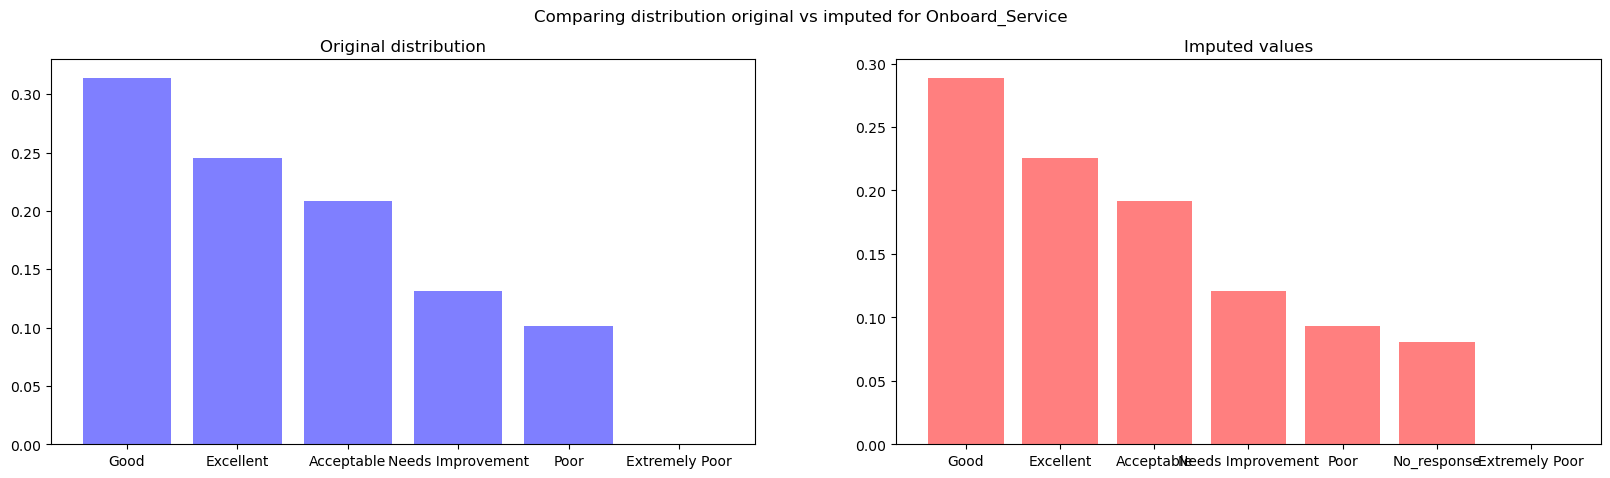

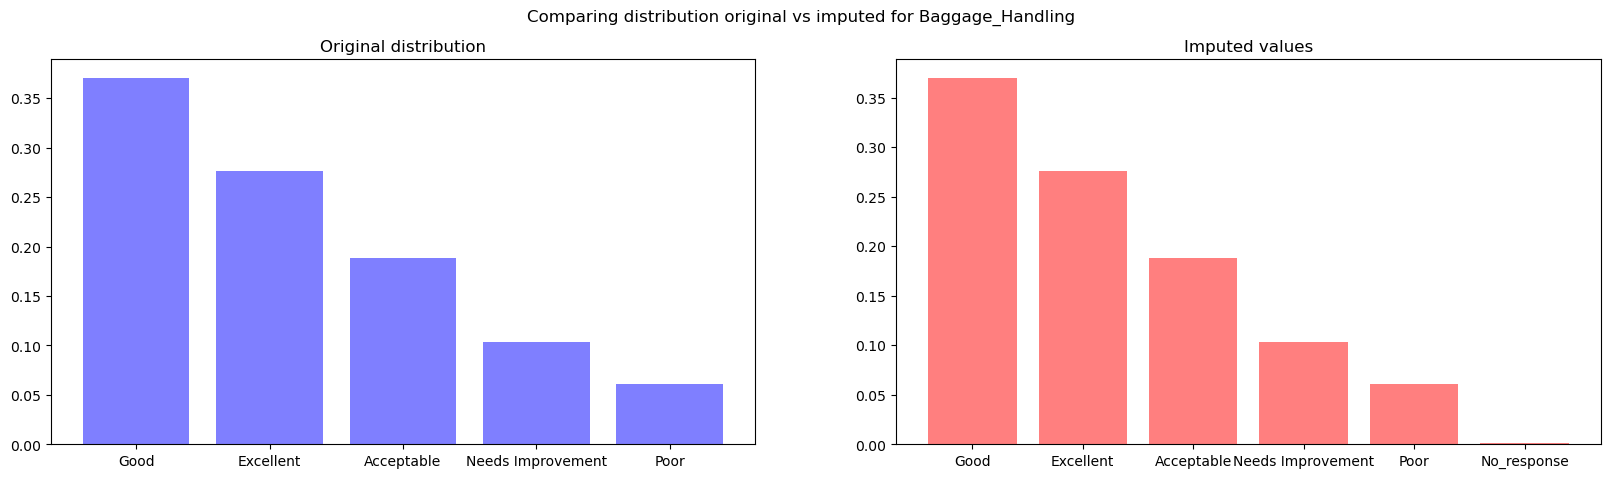

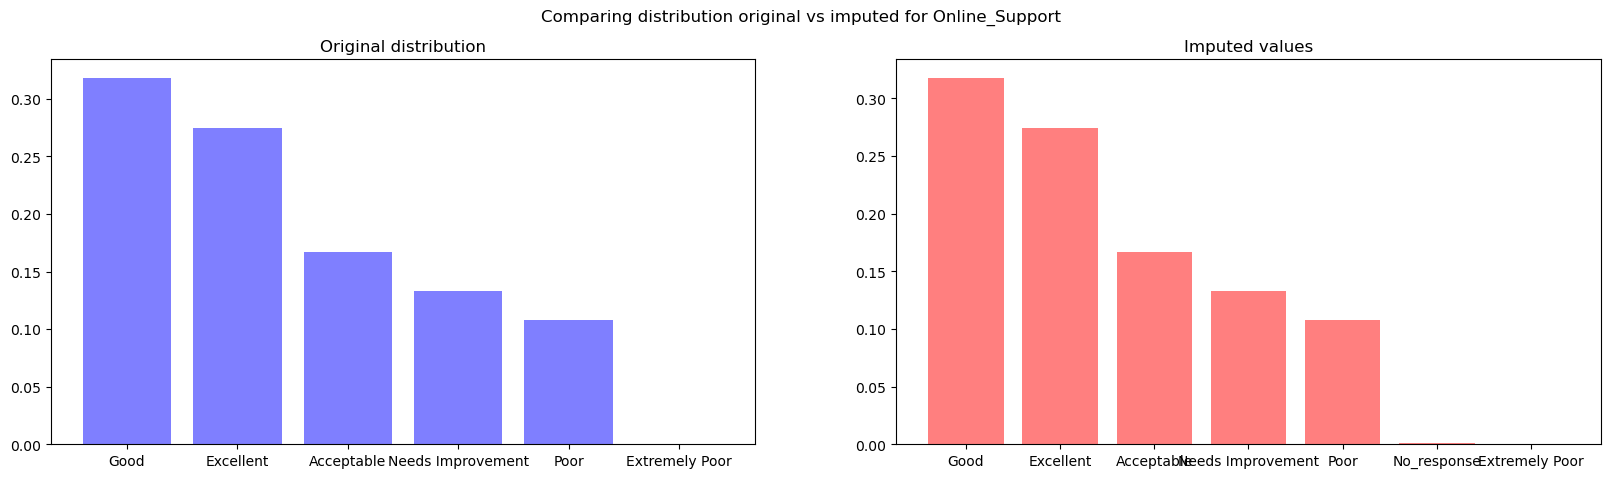

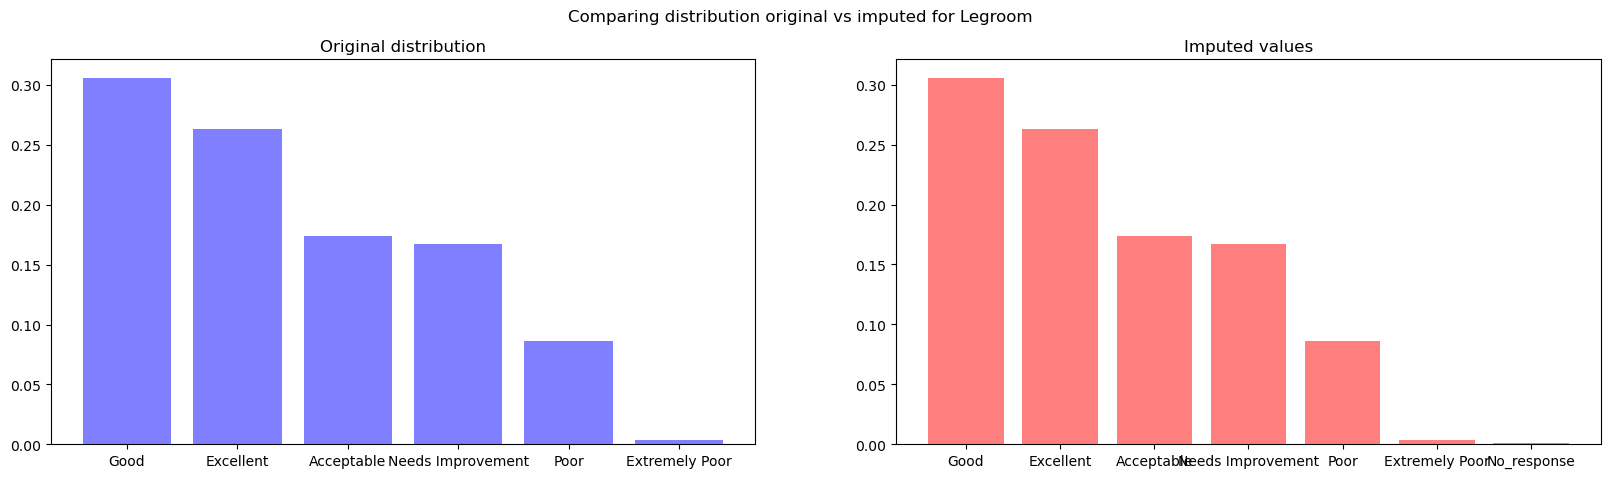

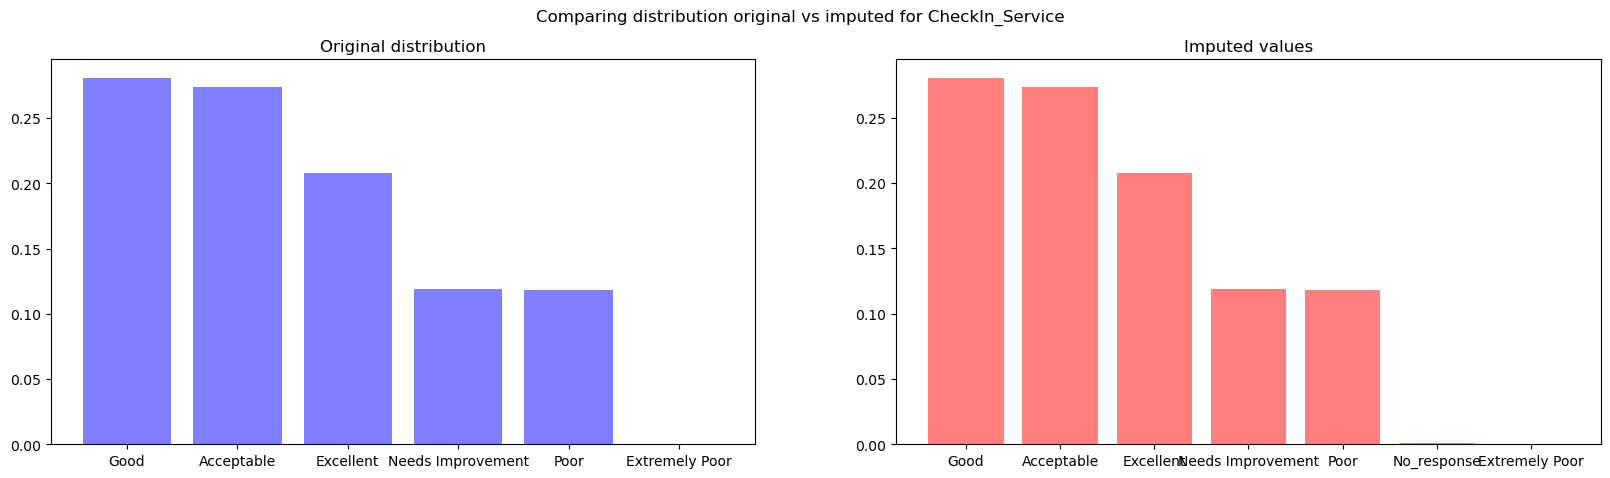

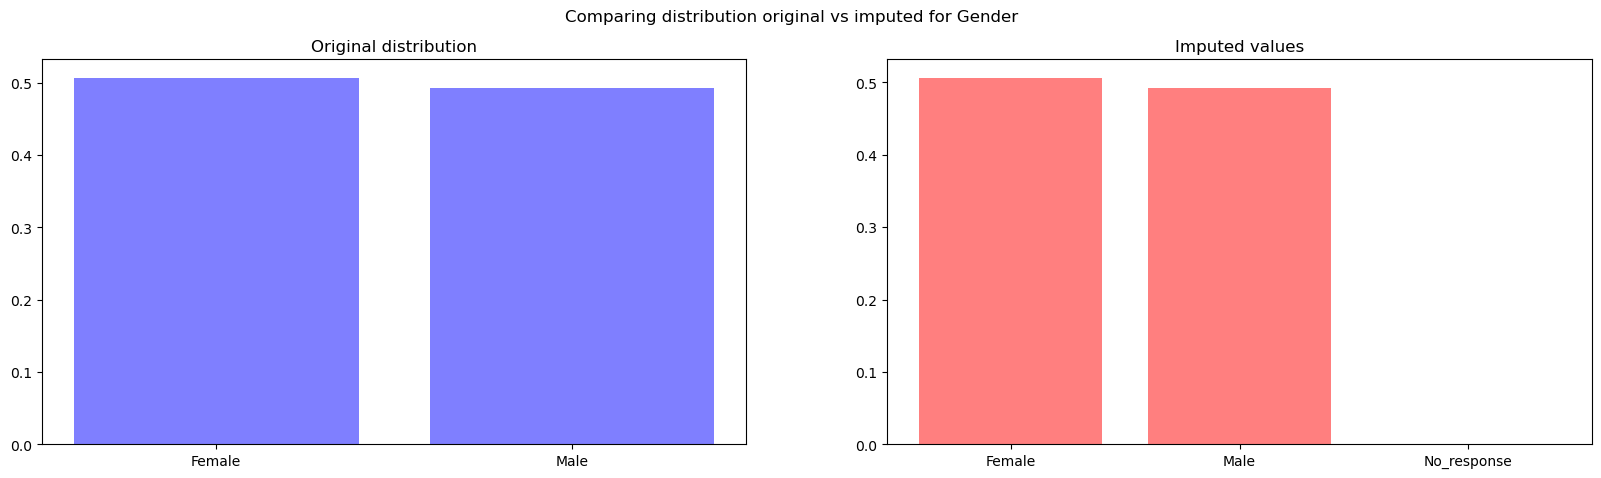

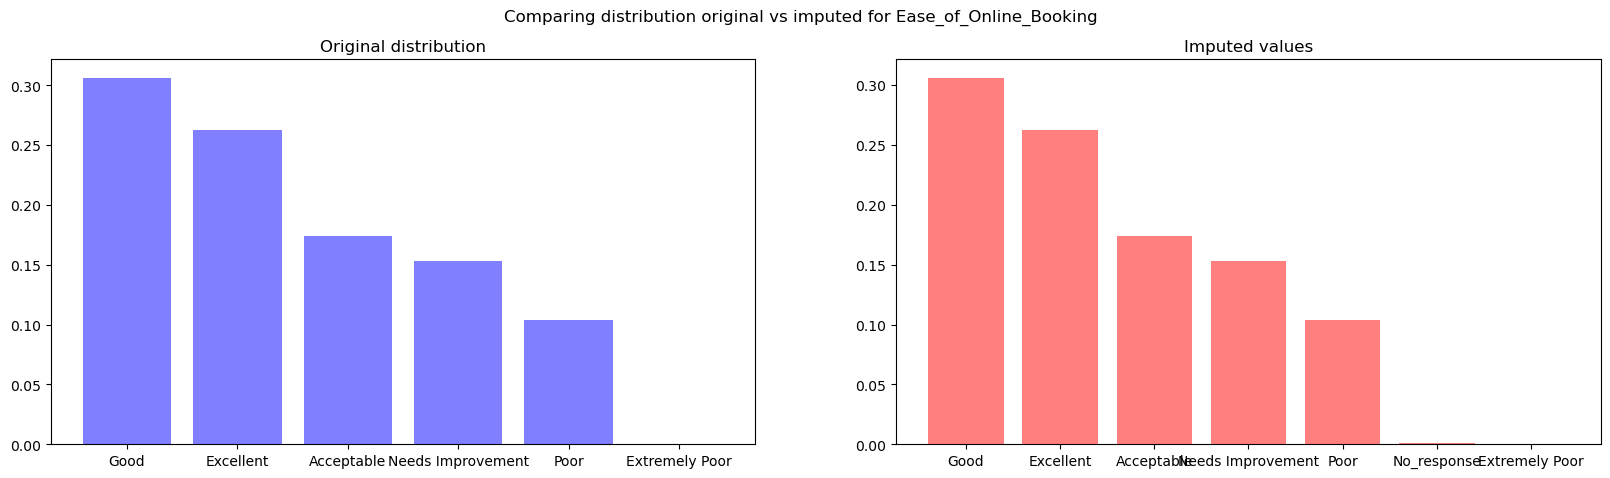

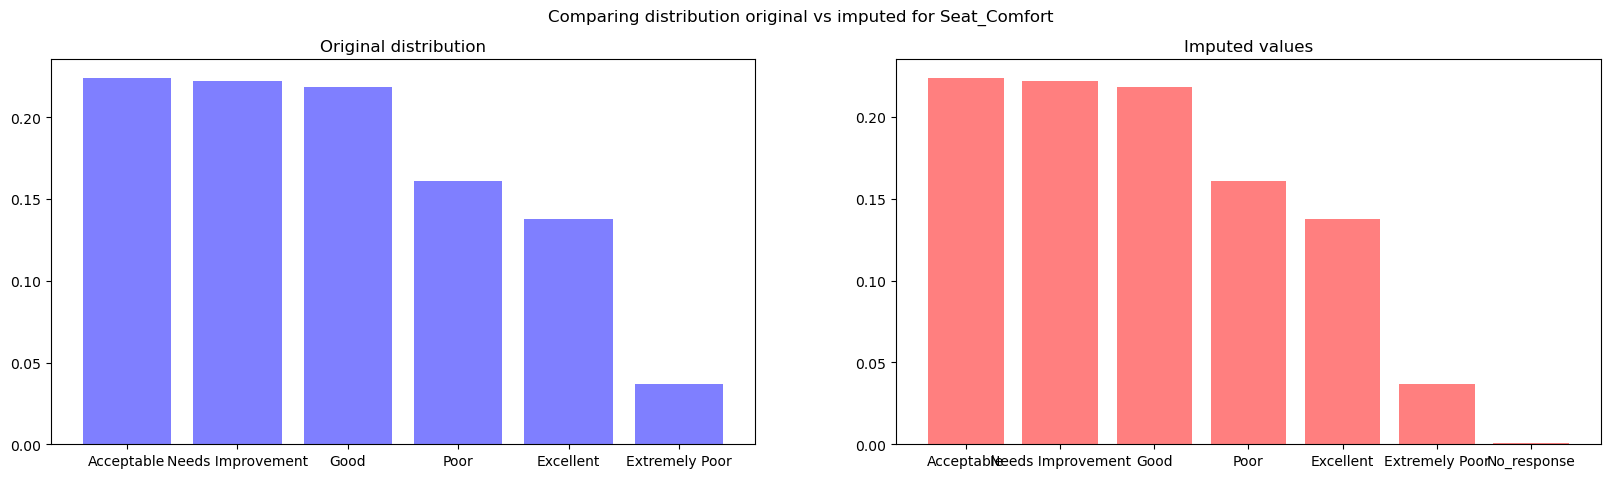

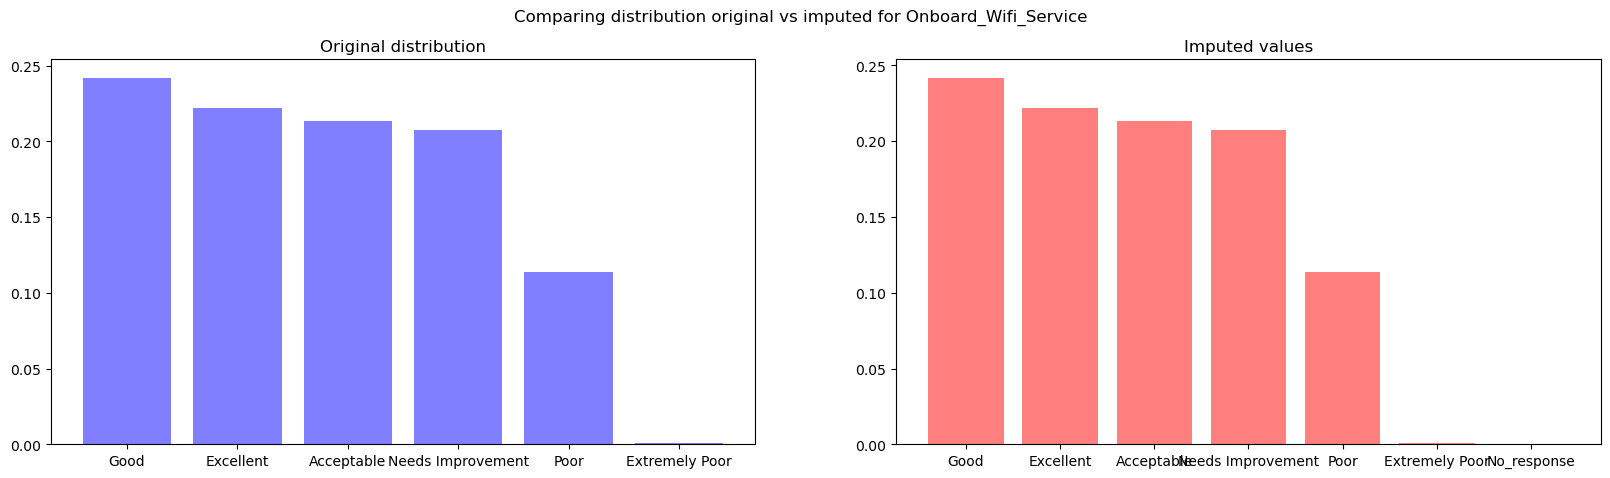

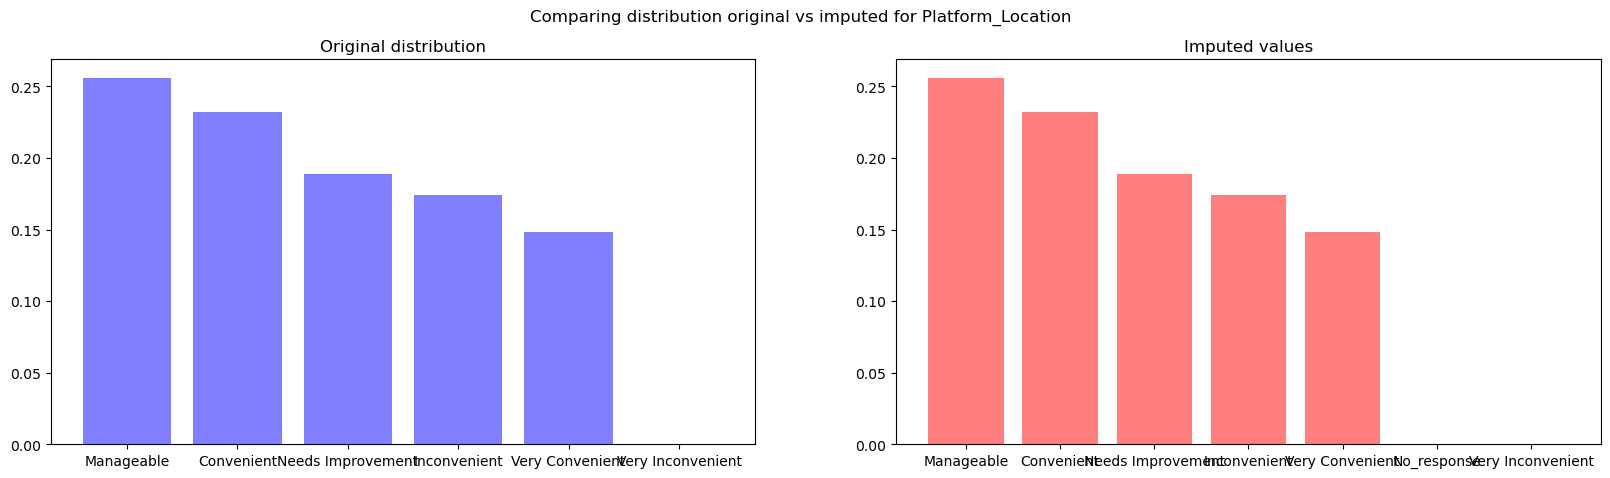

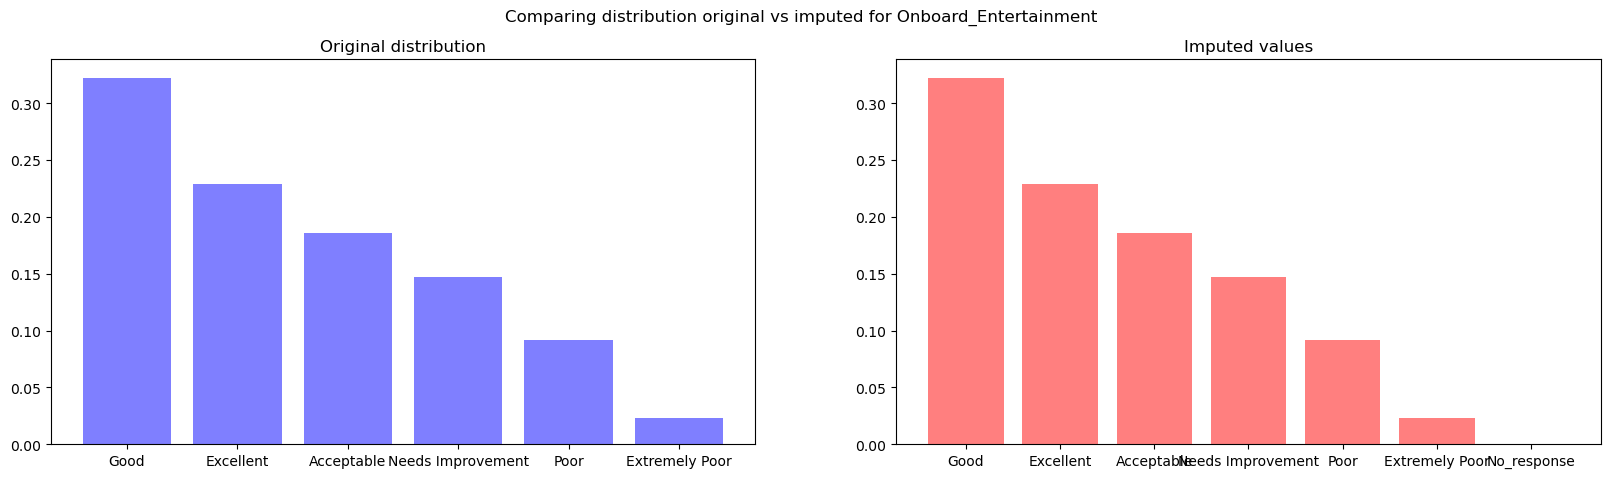

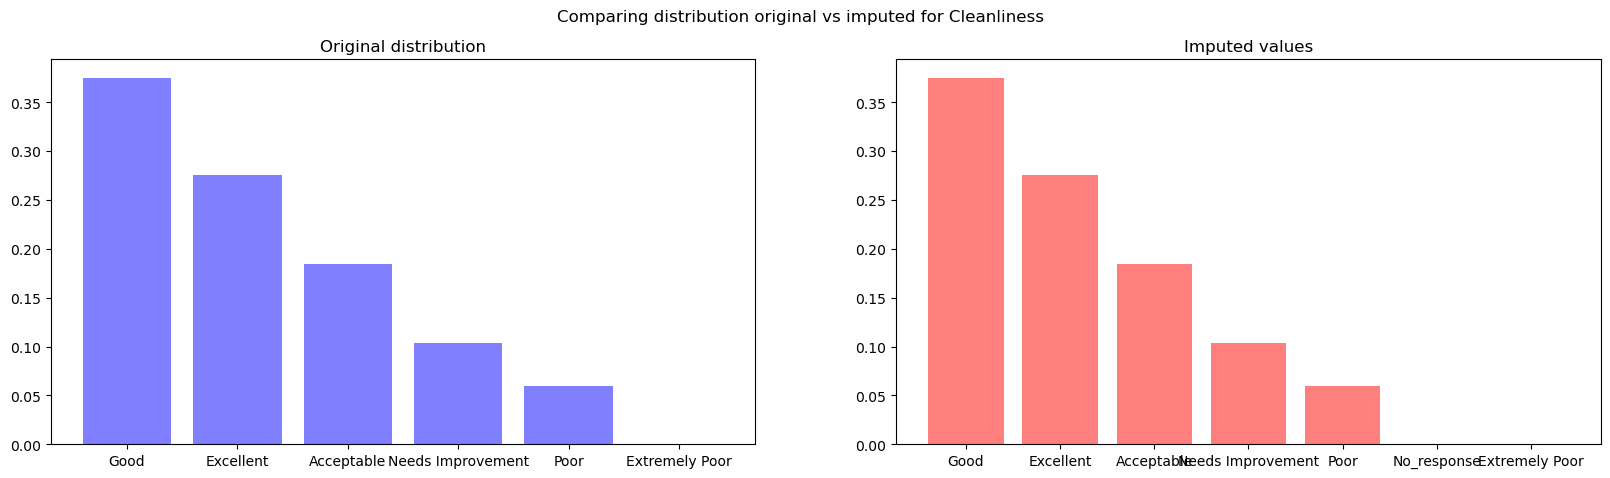

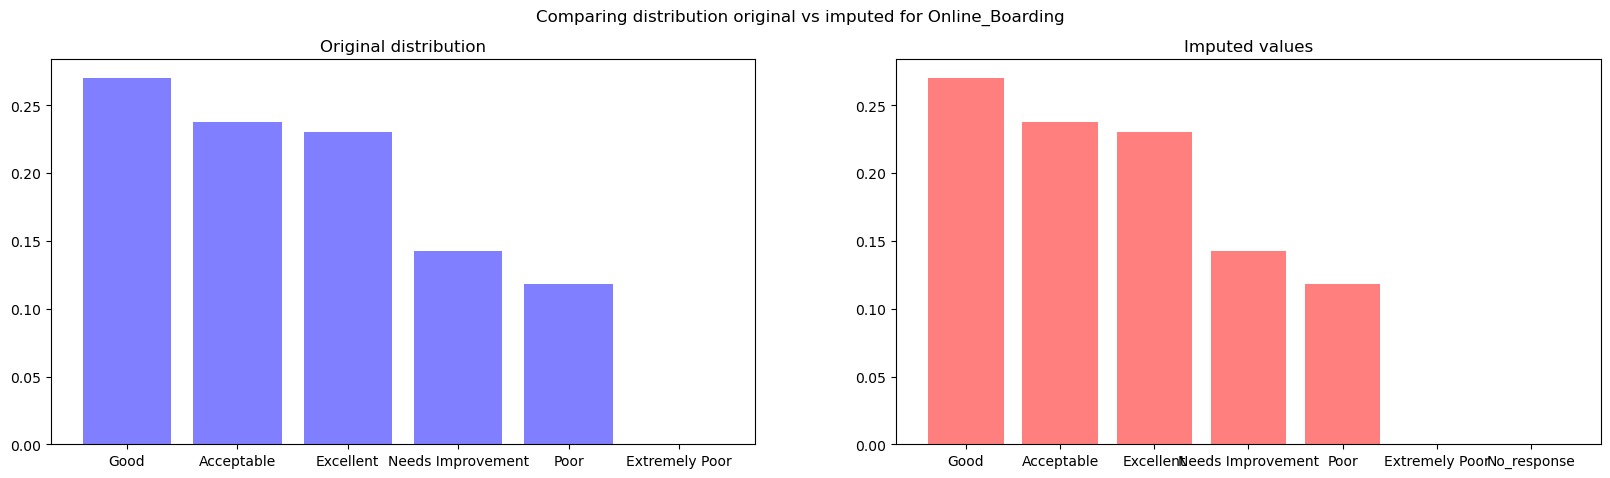

In [32]:
# Specify categorical columns to plot
categorical_columns_to_plot = ['Type_Travel', 'Customer_Type', 'Arrival_Time_Convenient', 'Catering', 
                               'Onboard_Service', 'Baggage_Handling', 'Online_Support', 'Legroom', 
                               'CheckIn_Service', 'Gender', 'Ease_of_Online_Booking', 'Seat_Comfort', 
                               'Onboard_Wifi_Service', 'Platform_Location', 'Onboard_Entertainment', 
                               'Cleanliness', 'Online_Boarding']  # or specify specific categorical columns

# Plot distributions for mode imputed data with transparency
plot_categorical_distribution(df, cat_imputed_data, categorical_columns_to_plot, 'Mode Imputed')

In [33]:
categorical_columns_test = categorical_columns
categorical_columns_test.remove('Overall_Experience')

In [34]:
imputed_df = pd.merge(mean_imputed_data[['ID', 'Overall_Experience'] + numerical_columns], cat_imputed_data[['ID'] + categorical_columns], on='ID')
imputed_test_df = pd.merge(mean_imputed_data_test[['ID'] + numerical_columns], 
                           cat_imputed_data_test[['ID'] + categorical_columns_test], on='ID')

In [35]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Age                      94379 non-null  float64
 3   Travel_Distance          94379 non-null  int64  
 4   Departure_Delay_in_Mins  94379 non-null  float64
 5   Arrival_Delay_in_Mins    94379 non-null  float64
 6   Gender                   94379 non-null  object 
 7   Customer_Type            94379 non-null  object 
 8   Type_Travel              94379 non-null  object 
 9   Travel_Class             94379 non-null  object 
 10  Seat_Comfort             94379 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  94379 non-null  object 
 13  Catering                 94379 non-null  object 
 14  Platform_Location     

In [36]:
imputed_test_df

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,36.0,532,0.0,0.0,Female,No_response,Business Travel,Business,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,21.0,1425,9.0,28.0,Female,Disloyal Customer,Business Travel,Business,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,60.0,2832,0.0,0.0,Male,Loyal Customer,Business Travel,Business,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,29.0,1352,0.0,0.0,Female,Loyal Customer,Personal Travel,Eco,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,18.0,1610,17.0,0.0,Male,Disloyal Customer,Business Travel,Business,Excellent,...,Excellent,Excellent,Excellent,Excellent,No_response,Acceptable,Excellent,Excellent,Excellent,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,99935598,8.0,1334,0.0,0.0,Male,Loyal Customer,Personal Travel,Eco,Needs Improvement,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
35598,99935599,53.0,1772,0.0,0.0,Female,Loyal Customer,Business Travel,Business,Needs Improvement,...,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
35599,99935600,22.0,1180,0.0,0.0,Male,Disloyal Customer,Business Travel,Eco,Good,...,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
35600,99935601,67.0,420,23.0,16.0,Female,Loyal Customer,Personal Travel,Eco,Excellent,...,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good


<Axes: >

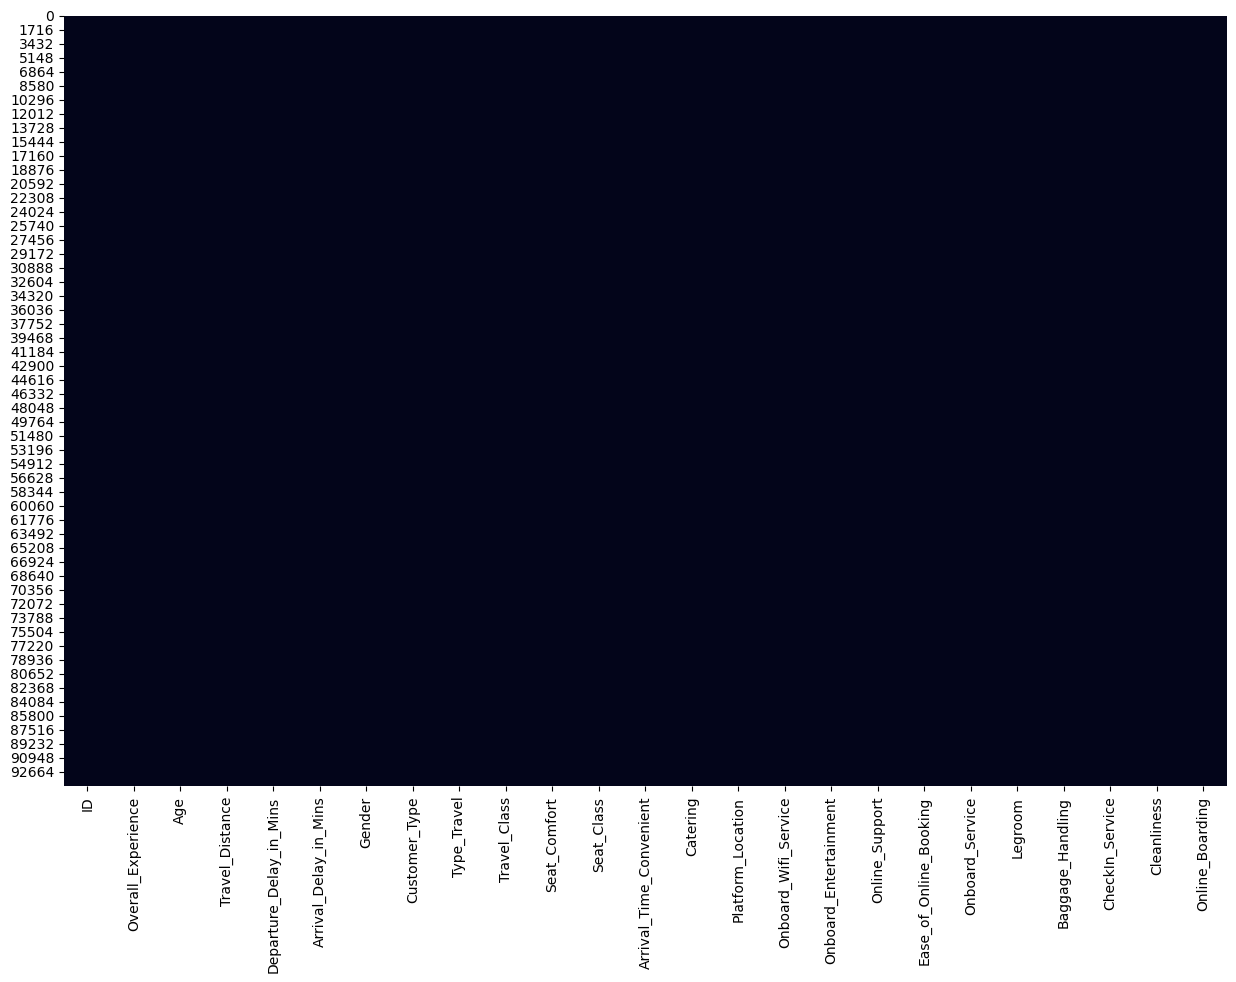

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(imputed_df.isnull(), cbar=False)

<Axes: >

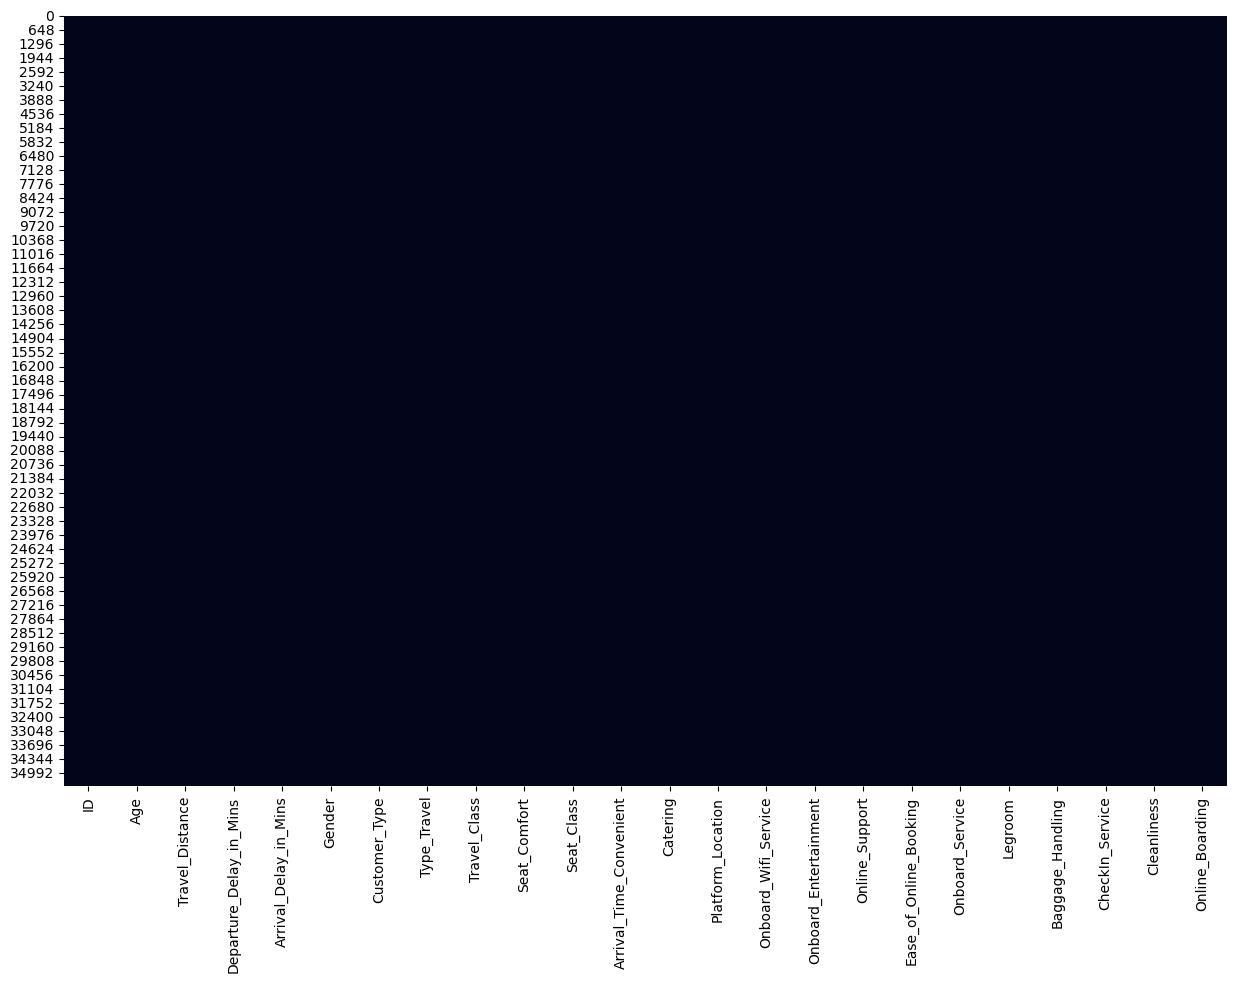

In [38]:
plt.figure(figsize=(15, 10))
sns.heatmap(imputed_test_df.isnull(), cbar=False)

In [39]:
imputed_df.to_csv('../../input/train/imputed_no_response_df.csv', sep=';', index=False)
imputed_test_df.to_csv('../../input/test/imputed_no_response_df.csv', sep=';', index=False)